Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



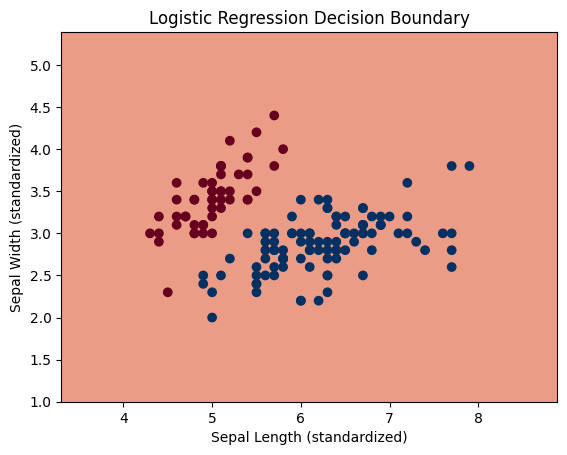

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # We'll use only the first two features for simplicity
y = (iris.target != 0) * 1 # Convert target labels to binary (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a logistic regression model
model = LogisticRegression(solver='liblinear')
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

1. Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable (Y). You want to fit a polynomial regression model to this data. Implement the process of selecting the appropriate degree for the polynomial (e.g., linear, quadratic, cubic) based on the dataset using Python.

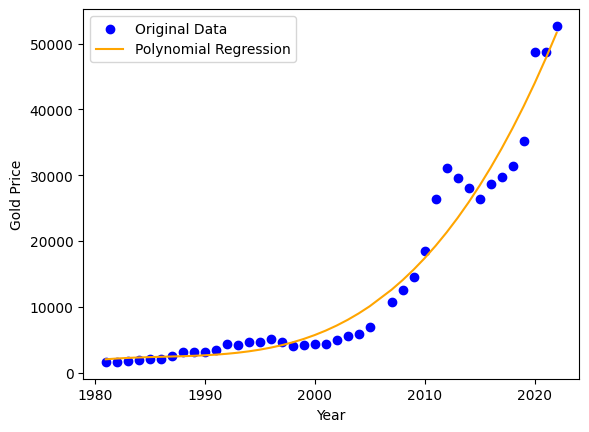

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data1.csv')
x,y = df.iloc[:,0].values.reshape(-1,1),df.iloc[:,1].values.reshape(-1,1)
deg = 3
poly_features = PolynomialFeatures(degree=deg)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly,y)
y_pred = model.predict(x_poly)
plt.scatter(x,y,c='blue',label='Original Data')
plt.plot(x,y_pred,c='orange',label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.legend()
plt.show()



2.Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable (Y). You want to fit a logistic regression model to this data. Develop an example code snippet in Python.

Confusion matrix:
[[1 7]
 [5 0]]
Classification report:
              precision    recall  f1-score   support

           0       0.17      0.12      0.14         8
           1       0.00      0.00      0.00         5

    accuracy                           0.08        13
   macro avg       0.08      0.06      0.07        13
weighted avg       0.10      0.08      0.09        13

Accuracy score:0.07692307692307693


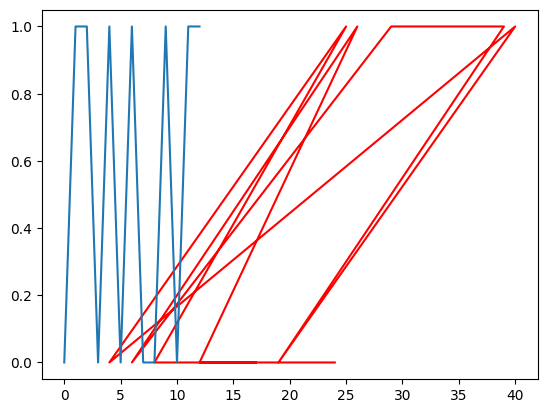

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
df = pd.read_csv('data1.csv')
x,y = df.iloc[:,0].values.reshape(-1,1),df.iloc[:,1].values.reshape(-1,1)
df['Class'] = 0
df.loc[df.iloc[:,1] > 10000,'Class'] = 1
y = df['Class']
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)
sc = StandardScaler()
x_train,x_test = sc.fit_transform(x_train),sc.fit_transform(x_test)
y_pred = model.predict(x_test)
print(f"Confusion matrix:\n{confusion_matrix(y_test,y_pred)}\nClassification report:\n{classification_report(y_test,y_pred)}")
print(f"Accuracy score:{accuracy_score(y_test,y_pred)}")

3.Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a dependent variable (Y). Implement in python, how you can perform multivariate polynomial regression to model the relationship between the independent variables and the dependent variable.

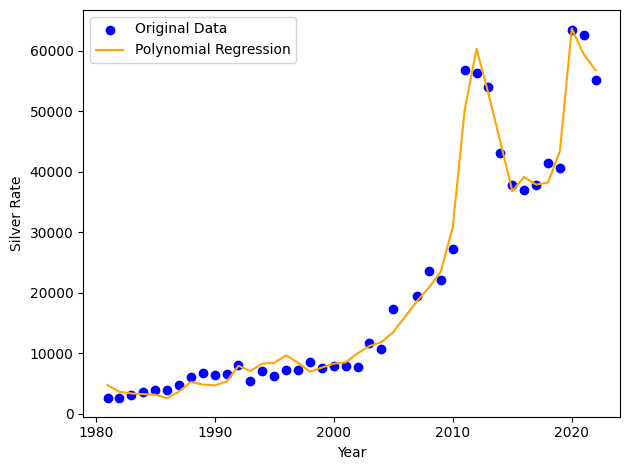

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data1.csv')
x,y = df[['Year','Gold']].values,df['Silver'].values.reshape(-1,1)
deg = 3
poly_features = PolynomialFeatures(degree=deg)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly,y)
y_pred = model.predict(x_poly)
plt.scatter(df['Year'],y,c='b',label='Original Data')
plt.plot(df['Year'],y_pred,c='orange',label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Silver Rate')
plt.legend()
plt.tight_layout()
plt.show()



4. Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a dependent variable (Y). Implement in python, how you can perform the logistic regression to model the relationship between the independent variables and the dependent variable

Confusion matrix:
[[8 0]
 [1 4]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.80      0.89         5

    accuracy                           0.92        13
   macro avg       0.94      0.90      0.92        13
weighted avg       0.93      0.92      0.92        13

Accuracy score: 0.9230769230769231


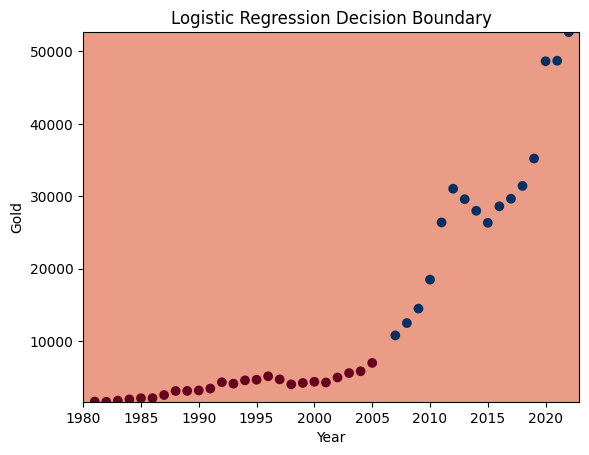

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv('data1.csv')
x, y = df[['Year', 'Gold']].values, df.iloc[:, -1].values.reshape(-1, 1)
df['Class'] = 0
df.loc[df.iloc[:, 1] > 10000, 'Class'] = 1
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the feature data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Create and train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print confusion matrix, classification report, and accuracy score
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification report:\n{classification_report(y_test, y_pred)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

# Define the range for the decision boundary plot
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

# Reduce the resolution of the meshgrid for decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Year')
plt.ylabel('Gold')
plt.title('Logistic Regression Decision Boundary')
plt.show()
